# Word Representation

- reuse: https://github.com/TensorMSA/tensormsa_jupyter/blob/master/chap13_chatbot_lecture/2.Word%20Representation.ipynb

### One Hot Vector를 통한 출력

In [3]:
from konlpy.tag import Mecab

qna_data = [ ['안녕', '만나서 반가워']
                ,['넌누구니', '나는 AI 봇이란다.']
                 ,['내 멍멍이가 아파', '어제 밤부터']
                ,['지금 몇살이야?', '견종은 뭐야?']
            ]
mecab = Mecab('/usr/local/lib/mecab/dic/mecab-ko-dic')

train_data = list(map(lambda x : mecab.morphs(' '.join(x)) , qna_data))

In [4]:
print(train_data)

[['안녕', '만나', '서', '반가워'], ['넌', '누구', '니', '나', '는', 'AI', '봇', '이', '란다', '.'], ['내', '멍멍이', '가', '아파', '어제', '밤', '부터'], ['지금', '몇', '살', '이', '야', '?', '견', '종', '은', '뭐', '야', '?']]


In [5]:
import itertools
train_data = list(itertools.chain.from_iterable(train_data))

print(list(train_data))

['안녕', '만나', '서', '반가워', '넌', '누구', '니', '나', '는', 'AI', '봇', '이', '란다', '.', '내', '멍멍이', '가', '아파', '어제', '밤', '부터', '지금', '몇', '살', '이', '야', '?', '견', '종', '은', '뭐', '야', '?']


In [6]:
import numpy as np
bucket = np.zeros(len(train_data), dtype=np.float)

for word in train_data :
    bucket_temp = bucket.copy()
    np.put(bucket_temp, train_data.index(word), 1)
    print(bucket_temp)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.

## Word to Vector (By Gensim)
### W2V를 통해 출력해보자

In [7]:
from gensim.models import word2vec

In [16]:
train_data = [train_data]
print(train_data)

[['안녕', '만나', '서', '반가워', '넌', '누구', '니', '나', '는', 'AI', '봇', '이', '란다', '.', '내', '멍멍이', '가', '아파', '어제', '밤', '부터', '지금', '몇', '살', '이', '야', '?', '견', '종', '은', '뭐', '야', '?']]


In [19]:
model = word2vec.Word2Vec(size=50, window=2, min_count=1)
model.build_vocab(train_data)
model.train(train_data, epochs=model.iter, total_examples=model.corpus_count)
print("model check : {0}".format(model))

model check : Word2Vec(vocab=30, size=50, alpha=0.025)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
import os  
file_path = './model'
if not os.path.exists(file_path):
    os.makedirs(file_path)
model.save(file_path + "/w2v.bin")
model = word2vec.Word2Vec.load("./model/w2v.bin")
print("model load check : {0}".format(model))

model load check : Word2Vec(vocab=30, size=50, alpha=0.025)


In [29]:
model

In [36]:
# vocab = 30
X = model.wv[vocab]
print(model.index2word)

AttributeError: 'Word2Vec' object has no attribute 'index2word'

### 안녕, AI등 값의 Vector값 출력 

In [30]:
print(model['안녕'])

[ 3.8604692e-03 -4.8492346e-03 -5.2242428e-03 -1.6282068e-03
 -9.5732380e-03  2.1533822e-03 -2.3953696e-03 -2.7202037e-03
 -4.5316159e-03  1.1802329e-03 -5.5819429e-03  2.1799924e-03
 -2.3676144e-04 -3.0934431e-03 -9.0621766e-03  7.9701428e-04
  6.4788475e-03  8.1910621e-03 -3.5957778e-03  6.0786298e-03
 -5.0011314e-03 -9.5046693e-03 -1.3411487e-03 -5.9741046e-03
  9.0233725e-04 -3.1054146e-03  9.9960826e-03 -7.0983623e-03
  5.4404396e-03  2.3980781e-03  1.6567834e-03  9.2309583e-03
 -3.2005031e-03  8.4862001e-03 -2.0677129e-05 -1.2268306e-03
  6.5300846e-03  3.7114895e-03  8.6291796e-03  7.2559342e-03
 -2.8772291e-03  3.6456941e-03 -2.1346158e-03  8.1894686e-03
  6.4543299e-03 -3.7603609e-03  6.2615881e-03  4.8443801e-03
  3.5232066e-03 -7.6221079e-03]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [31]:
print(model['AI'])

[-0.00992008  0.00681421 -0.0077297  -0.00778366  0.00402166 -0.00518713
 -0.00486169  0.00342475  0.00878954  0.00633302 -0.00608061 -0.00049431
 -0.00601176 -0.00841397 -0.00869776 -0.00734067 -0.00095624 -0.00224339
 -0.00434642  0.00332235 -0.00715191 -0.00222878 -0.00723377 -0.00867838
  0.00477038 -0.00575358 -0.0068644   0.00515579  0.00455272 -0.00563019
 -0.00876246 -0.00278532 -0.00343406 -0.00445798  0.00466245  0.00270222
 -0.00771732  0.00949906 -0.00470055  0.00703402  0.00683222  0.00623171
  0.00885638 -0.00553706  0.0001488   0.00309438  0.0020404  -0.0046726
 -0.00682524  0.00193697]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [32]:
result1 = model.most_similar(positive='안녕', negative='', topn=10)
print(result1)

[('나', 0.3063454031944275), ('야', 0.2979080080986023), ('누구', 0.21369366347789764), ('살', 0.1956581175327301), ('멍멍이', 0.1636258065700531), ('란다', 0.15156051516532898), ('?', 0.13137897849082947), ('이', 0.12422192841768265), ('은', 0.11131147295236588), ('니', 0.08943584561347961)]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


            x           y word
0   17.286390   70.826363    이
1  -32.850517  -26.652617    야
2  -15.360190   -1.676795    ?
3  -10.623845   89.511696   안녕
4  -46.722542   88.628723   만나
5  -55.362209  -50.704403    서
6   84.578156    8.162787  반가워
7   82.865868   49.464401    넌
8   -2.371431  -33.250835   누구
9  -82.560204   16.524408    니
10  56.813442   29.452059    나
11  14.094723  -63.332767    는
12 -20.740776  -62.759579   AI
13  49.714867  -57.334881    봇
14  29.688730  100.668243   란다
15  51.980652   -6.655529    .
16  52.532806   68.540047    내
17  30.936914  -30.242905  멍멍이
18  31.429611   13.382391    가
19  28.403980   43.137573   아파
20 -33.182919   58.535561   어제
21 -72.204659  -18.493074    밤
22 -53.031879   32.698372   부터
23  12.489346   -7.228228   지금
24 -46.204956    2.198147    몇
25  -4.545218   51.170185    살
26 -24.042812   26.761196    견
27  74.831055  -29.796196    종
28   4.299504   22.902647    은
29 -73.086288   58.526863    뭐


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 51060 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 50556 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45397 missing from

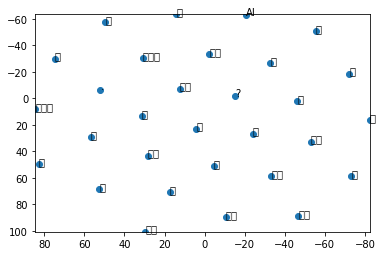

In [38]:
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt


#font_name = matplotlib.font_manager.FontProperties(
#                fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 위치를 넣어주세요
#            ).get_name()
vocab = model.wv.index2word
matplotlib.rc('font')
            #, family=font_name)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X) #t-분포 확률적 임베딩(t-SNE)은 데이터의 차원 축소에 사용
df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)

df.columns = ['x', 'y', 'word']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
print(df)
ax.scatter(df['x'], df['y'])
ax.set_xlim(df['x'].max(), df['x'].min())
ax.set_ylim(df['y'].max(), df['y'].min())
for i, txt in enumerate(df['word']):
    ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))
plt.show()